# Importing Header and SoilPrep

In [1]:
import import_ipynb 
from Header import *

importing Jupyter notebook from Header.ipynb


In [2]:
import import_ipynb
from SoilPrep import * 

importing Jupyter notebook from SoilPrep.ipynb


# Step 0: Setting up decision parameters (Data Tree)

In [3]:
# 0. Available smoothing filter types: savgol1 and savgol2 ------------------------ (0)
sg_filters = ['sg1', 'sg2']

# 0. Available window lengths for the smoothing filter ---------------------------- (0)
window_lengths = [0, 1, 11, 21, 31, 41, 51]

# 1. Available machine learning regression models --------------------------------- (1)
ml_methods = ['mult', 'cubist', 'svr',  'ridge', 'plsr', 'randomforest',  'gbrt']

# 2. Names of target variables in the dataframe ----------------------------------- (2)
target_names = ['Sand', 'Silt', 'Clay', 'TOC']

# 3. Available preprocessing for Target data -------------------------------------- (3)
prepare_target = ['none']
# 4. Available preprocessing for Spectral data ------------------------------------ (4)
prepare_spec = ['none', 'fod2', 'cr', 'log']
# 5. Resampling bands available for spectra --------------------------------------- (5) 
nbands_sampling = [0,2,3,5,7,9,10,11,13,15,17,19,20,21,23,25,27,29,30,31,33,35,37,39, 40, 45, 50, 55, 60, 70, 80, 90, 100]


# Setting colours for different targets        --------------------------------------
clr = ['#F4A460', '#8B7355', '#A52A2A', 'green']

# Colour scheme definition
kado = '#8B7355'
mati = '#A52A2A'
balu = '#F4A460'

In [4]:
MetaData = {'sg_filters' : sg_filters, 'window_lengths' : window_lengths, 'prepare_spec' : prepare_spec, \
            'nbands_sampling' : nbands_sampling, 'target_names' : target_names, 'prepare_target' : prepare_target,\
            'ml_methods' : ml_methods, 'clr' : clr}

with open ('meta_data.pickle', 'wb') as file:
    pickle.dump(MetaData, file)

# Step 1a: Obtaining Spectra (Noise and Outliers removal)

In [5]:
# Colour scheme definition
kado = '#8B7355'
mati = '#A52A2A'
balu = '#F4A460'

In [6]:
#----------- Reading lab data and emit data -----------------------------
df_lab = pd.read_csv('uae.csv')
df_sat = pd.read_csv('uae_emit.csv')

#-------------Renaming columns---------------------------------------------------------------------------
df_sat.rename(columns= {'latitude':'long', 'longitude': 'lat'}, inplace=True)
df_lab.rename(columns = {'Lon': 'long', 'Lat':'lat'}, inplace = True)
df_sat.rename(columns = {'OM': 'TOC', 'Clay': 'clay', 'Silt':'silt', 'Sand': 'sand'}, inplace = True)

In [7]:
clean_sat = df_sat.copy()
clean_lab = df_lab.copy()

clean_sat.reset_index(drop=True)
clean_lab.reset_index(drop=True)

,FID,long,lat,TOC,clay,silt,sand,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,...,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1,54.736553,24.236353,0.22,0,1.0,98.0,0.089311,0.101862,0.116344,0.117707,0.113324,0.113424,0.115095,0.110248,0.103506,0.105503,0.110169,0.112541,0.118426,0.115746,0.105909,0.107894,0.107123,0.109696,0.117092,0.117855,0.119902,0.121461,0.116911,0.112778,0.115075,0.119952,0.121716,0.123712,0.124466,0.123697,0.121629,0.121883,0.124804,0.122874,0.119764,0.123741,0.127166,0.126157,0.124842,0.123106,0.122967,0.125440,0.125761,...,0.505024,0.503972,0.503082,0.502225,0.500965,0.499482,0.498255,0.497150,0.495687,0.494069,0.492573,0.490743,0.489241,0.487959,0.486013,0.484152,0.482461,0.480586,0.478966,0.477298,0.475440,0.473770,0.471942,0.470410,0.469083,0.467510,0.466006,0.464431,0.462235,0.460467,0.459512,0.458457,0.457830,0.457056,0.455510,0.453568,0.451408,0.450124,0.449204,0.449205,0.448691,0.447846,0.446950,0.445301,0.444228,0.443859,0.443358,0.442132,0.440855,0.440254
1,2,54.712263,24.253125,0.23,0,0.0,100.0,0.071750,0.082479,0.097936,0.097098,0.090665,0.095351,0.098170,0.092902,0.085862,0.087585,0.090802,0.091751,0.100449,0.096611,0.084396,0.089818,0.089340,0.090029,0.096445,0.094647,0.095934,0.099914,0.094580,0.091928,0.096085,0.098593,0.098399,0.100215,0.103574,0.103900,0.101460,0.100196,0.101961,0.101015,0.099445,0.101963,0.103266,0.101319,0.100529,0.099800,0.100243,0.102263,0.101308,...,0.450318,0.448831,0.447116,0.445905,0.445075,0.443562,0.442045,0.440411,0.438146,0.436031,0.434178,0.431873,0.429721,0.427904,0.426066,0.424598,0.423261,0.421830,0.420088,0.417828,0.415412,0.412745,0.410257,0.408520,0.406483,0.404732,0.403398,0.401255,0.399124,0.397683,0.396048,0.394434,0.393051,0.390887,0.388737,0.387267,0.386171,0.385700,0.384558,0.383507,0.382384,0.380523,0.379745,0.379368,0.378552,0.378313,0.376914,0.375947,0.374874,0.374323
2,3,54.628437,24.201236,0.54,7,2.0,71.0,0.041403,0.053078,0.069837,0.072832,0.069875,0.074908,0.074440,0.068492,0.064969,0.060439,0.061995,0.069090,0.075366,0.072394,0.063782,0.066973,0.063572,0.064333,0.076012,0.074383,0.073874,0.076919,0.069139,0.067084,0.073654,0.077595,0.078171,0.078817,0.079354,0.078619,0.076882,0.076737,0.078894,0.078441,0.077030,0.078739,0.080757,0.080092,0.078368,0.077739,0.078954,0.081610,0.081029,...,0.254087,0.253243,0.252018,0.250617,0.249314,0.247589,0.246501,0.245682,0.244078,0.242976,0.241615,0.239750,0.238310,0.236734,0.235230,0.233702,0.232329,0.231019,0.229220,0.227910,0.226667,0.224981,0.223713,0.222331,0.220553,0.219432,0.218279,0.216748,0.215095,0.212785,0.210994,0.210149,0.209413,0.208985,0.208481,0.207685,0.206786,0.205675,0.205031,0.203774,0.202939,0.202970,0.201991,0.200577,0.199762,0.198509,0.197953,0.196985,0.196200,0.196456
3,4,54.637328,24.167353,0.06,0,1.0,74.0,0.127570,0.137622,0.152223,0.150098,0.142105,0.142880,0.146324,0.144206,0.141614,0.138125,0.138871,0.142214,0.146783,0.144006,0.135700,0.141869,0.140081,0.139891,0.145967,0.144568,0.146686,0.150084,0.145208,0.141791,0.146449,0.151923,0.151835,0.152822,0.155049,0.154900,0.152437,0.152329,0.154825,0.153069,0.150946,0.155493,0.159144,0.157156,0.154593,0.153615,0.155277,0.159256,0.158817,...,0.477536,0.476374,0.475360,0.474317,0.472941,0.471083,0.469237,0.467607,0.465895,0.464562,0.463261,0.461304,0.459077,0.456753,0.454284,0.452215,0.450451,0.448153,0.445981,0.443916,0.441472,0.439588,0.437714,0.435782,0.434151,0.432324,0.430425,0.428736,0.426160,0.423627,0.422163,0.420034,0.418287,0.417215,0.415542,0.414107,0.413113,0.412229,0.411363,0.410837,0.410158,0.409710,0.408636,0.406409,0.405014,0.403905,0.403292,0.403064,0.402813,0.401774
4,5,54.871967,24

In [8]:
# obtaining corresponding rows of clean_sat using clean_lab and removing extra rows -------------- 

missing_rows =[]

(row, col) = clean_sat.shape
small_lab = clean_lab.iloc[0:row,:].copy()

for i in range (0, row):
    lat = clean_sat.iloc[i, clean_sat.columns.get_loc('lat')]
    long = clean_sat.iloc[i, clean_sat.columns.get_loc('long')]
    temp = clean_lab.loc[:,:][(clean_lab.loc[:,'lat'] == lat) & (clean_lab.loc[:,'long'] == long)]
    (r, c) = temp.shape
    if r == 0:
        #print('missing:', i)
        missing_rows.append(i)
        #print(r, 'at', i)
    else:
        #print(i)
        small_lab.iloc[i,:] = temp.iloc[0, :].copy()
        

small_lab = small_lab.drop(small_lab.index[missing_rows]).copy()
small_sat = clean_sat.drop(clean_sat.index[missing_rows]).copy()
#small_sat.rename(columns = {'OM': 'TOC', 'Clay': 'clay', 'Silt':'silt', 'Sand': 'sand'}, inplace = True)
small_lab.reset_index()
small_sat.reset_index()
small_lab.shape

(83, 2158)

## Extracting spectra from small_sat and small_lab

In [9]:
min_loc_sat = small_sat.columns.get_loc('field_30')
max_loc_sat = small_sat.columns.get_loc('field_312')
small_sat_spec = small_sat.iloc[:, min_loc_sat: max_loc_sat+1].copy()
print(small_sat_spec.shape)

min_loc_lab = small_lab.columns.get_loc('380')
max_loc_lab = small_lab.columns.get_loc('2500')
small_lab_spec = small_lab.iloc[:, min_loc_lab: max_loc_lab].copy()
print(small_lab_spec.shape)

(83, 283)
(83, 2120)


### Resampling small_lab_spec into 283 bands

In [10]:
sampled_lab_spec = resample_spectra(small_lab_spec, 283)
sampled_lab_spec.shape

(83, 283)

### Renaming columns of sampled_sat_spec using columns of sampled_lab_spec

In [11]:
header = list(sampled_lab_spec.columns.values)
sampled_sat_spec = small_sat_spec.copy()
sampled_sat_spec.columns = header
sampled_sat_spec.shape

(83, 283)

### Obtaining faulty bands using sampled_sat_spec

<AxesSubplot:>

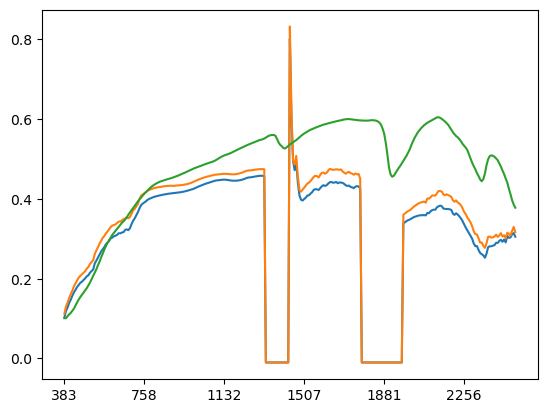

In [12]:
for i in range (0,2,1):
    sampled_sat_spec.iloc[i,:].plot()
sampled_lab_spec.iloc[1,:].plot()

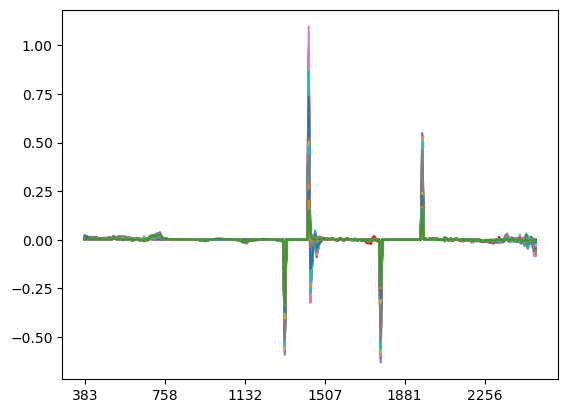

In [13]:
fod_sat = fod(sampled_sat_spec)
fod_sat
for i in range (0,83,1):
    fod_sat.iloc[i,:].plot()

,1320,1432,1440,1447,1769,1964
1,-0.484533,0.842585,-0.20953,-0.126529,-0.461067,0.370448


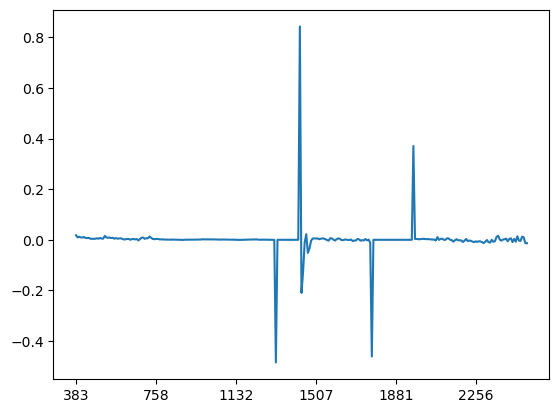

In [14]:
fod_sat.iloc[1,:].plot()

fod_sat1 = fod_sat.iloc[[1],:].copy()
b_col = (abs(fod_sat1) >=0.1).any()
fod_sat1 = fod_sat1.loc[: , b_col]
fod_sat1

In [15]:
#sampled_sat_spec.columns.get_loc('1964')

### Dropping faulty bands from sampled_sat_spec and sampled_lab_spec

In [16]:
# Select faulty column based on condition (i,e. boundary columns-- [1320/125:1447/142] + [1769/185:1964/211])-
faulty_columns = list(np.arange(125,143,1)) + list(np.arange(185,212,1))
print(faulty_columns)

[125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211]


In [17]:
sat_spec = sampled_sat_spec.drop(sampled_sat_spec.columns[faulty_columns], axis=1).copy()
lab_spec = sampled_lab_spec.drop(sampled_lab_spec.columns[faulty_columns], axis=1).copy()

## Setting the "spectra" for future computations

In [18]:
spectra = sat_spec.copy()
spectra.shape

(83, 238)

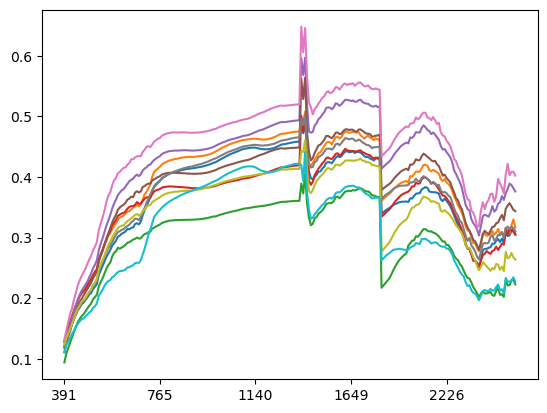

In [19]:
for i in range (0,10,1):
    spectra.iloc[i,1:].plot()

# Step 1b: Obtaining Targets (Outliers removal and Normalization)

In [20]:
df = pd.read_csv('uae.csv')
df.rename(columns = {'clay':'Clay', 'silt': 'Silt', 'sand': 'Sand'}, inplace = True)
# ------------- Target Isolation ----------------------

clr = ['#F4A460', '#8B7355', '#A52A2A', 'green']

def isolate_targets(df, target_names):
    T=[]
    for i in range (0,len(target_names)):
        T.append(df[target_names[i]])
    return(T)
    
T = isolate_targets(df,target_names)

# Step 1c: Spectra Preprocessing (Smooth, FOD/Contin/Log , and Resample)

## Savgol smoothing (order 1 and order 2)

In [21]:
# -------------- Smoothed Spectra spec1 (savgol order 1) and spec2 (savgol order 2)  -----------

spec1 = {}
for i in window_lengths:
    spec1[i] = filt_sg(spectra, i, 'sg1')                   

spec2 = {}
for i in window_lengths:
    spec2[i] = filt_sg(spectra, i, 'sg2')

smth_spec = sgsmooth (spectra, 3)    

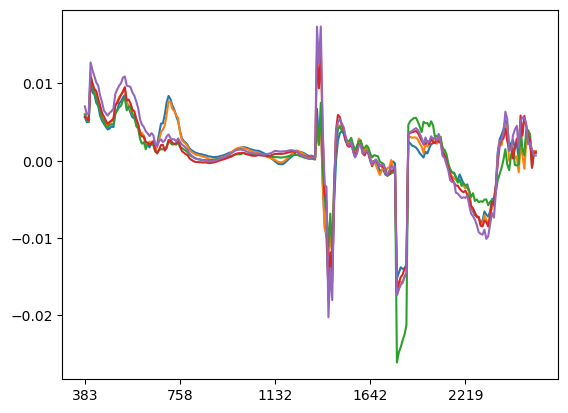

In [22]:
fod_spec = fod(smth_spec)

for i in range (0,5,1):
    fod_spec.iloc[i,:].plot()


## Continuum Removal

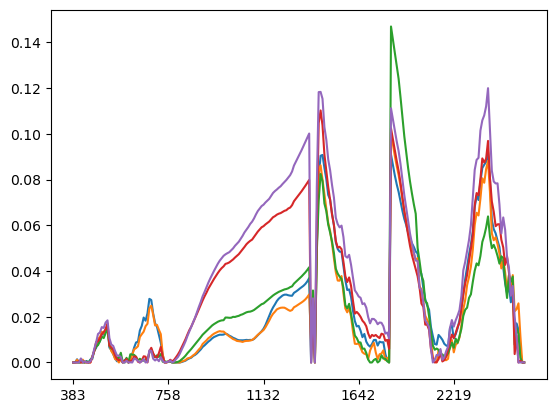

In [23]:
cr_spec = continuum_removed(spec2[51])

for i in range (0,5,1):
    cr_spec.iloc[i,:].plot()
    

## log(1/R) Transformation

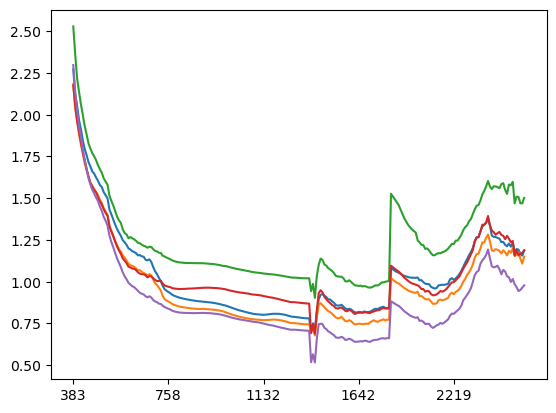

In [24]:
log_spec = ((1/spec2[51]).apply(np.log)).copy()
#log_spec.head(5)

for i in range (0,5,1):
    log_spec.iloc[i,:].plot()   

## Resampling (n_bands)

### 1. Sampled Original (sampled_spec)

In [25]:
sampled_spec = {}
for n in nbands_sampling:
    sampled_spec[n] = resample_spectra (spec2[51], n)

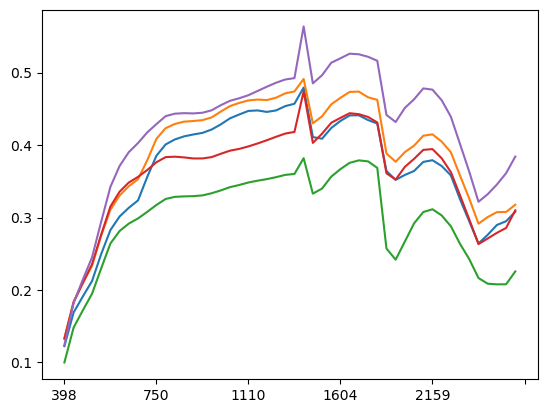

In [26]:
for i in range (0,5,1):
    sampled_spec[50].iloc[i,:].plot()

### 2. Sampled Continuum Removed  (sampled_cr)

In [27]:
sampled_cr = {}
for n in nbands_sampling:
    sampled_cr[n] = resample_spectra (cr_spec, n)

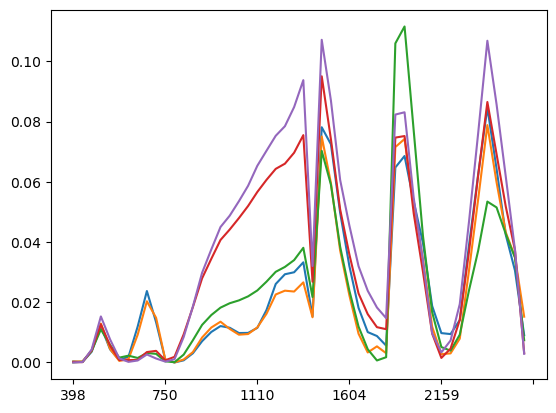

In [28]:
for i in range (0,5,1):
    sampled_cr[50].iloc[i,:].plot()

### 3. Sampled Log (sampled_log)

In [29]:
sampled_log = {}
for n in nbands_sampling:
    sampled_log[n] = resample_spectra (log_spec, n)

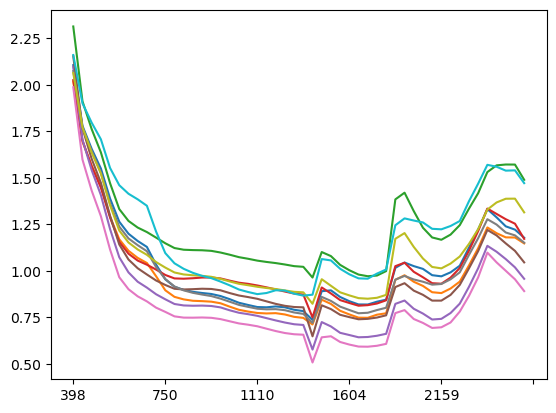

In [30]:
for i in range (0,10,1):
    sampled_log[50].iloc[i,:].plot()

### 4.  FOD of sampled spectra (fod_sampled)

In [31]:
fod_sampled = {}
for n in nbands_sampling:
    fod_sampled[n] = fod (sampled_spec[n])

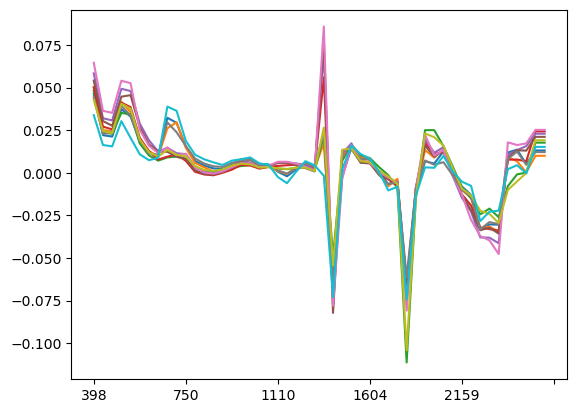

In [32]:
for i in range (0,10,1):
    fod_sampled[50].iloc[i,:].plot()

## Visualizing Processed Spectrum (variable samples)

In [33]:

# (row, col)

In [34]:
def plot_spec (sample, process):
    (row, col) = spectra.shape
    x1 = spec2[51].iloc[sample,:]
    x1.plot()
    if process == 'cr':
        x2 = cr_spec.iloc[sample,:]
        x2.plot()
    elif process == 'log':
        x3 = log_spec.iloc[sample,:]/3
        x3.plot()
    else:
        x4 = fod_spec.iloc[sample,:]*100
        x4.plot()
        
    plt.ylim([-0.6, 0.9])
    
(row, col) = spectra.shape
ipywidgets.interact(plot_spec, sample = (0, row, 1), process = prepare_spec)

interactive(children=(IntSlider(value=41, description='sample', max=83), Dropdown(description='process', optio…

<function __main__.plot_spec(sample, process)>

## Correlation between wavelengths and Targets

In [35]:
def find_rpval (spectra, tar):
    (r, c) = spectra.shape
    
    r_val = spectra.iloc[[0], :].copy()
    p_val = spectra.iloc[[0], :].copy()
    
    for j in range(0, c):
        r_val.iloc[0,j], p_val.iloc[0,j] = stats.pearsonr(tar, spectra.iloc[:, j])
    
    return(r_val, p_val)


In [38]:
# plt.style.use(['science','notebook','grid'])

# def plot_corr (target, prepare, n_bands):
    
#     i = target_names.index(target)    
    
#     if  prepare == 'none':
#         r_val, p_val = find_rpval (sampled_spec[n_bands], T[i])
#         r_val.iloc[0,:].plot(color = clr[i])
#     elif  prepare == 'cr':
#         r_cr, p_cr = find_rpval (sampled_cr[n_bands], T[i])
#         r_cr.iloc[0,:].plot(color = clr[i])
#     elif prepare == 'log':
#         r_log, p_log = find_rpval (sampled_log[n_bands], T[i])
#         r_log.iloc[0,:].plot(color = clr[i])
#     else:    
#         r_fod, p_fod = find_rpval (fod_sampled[n_bands], T[i])
#         r_fod.iloc[0,:].plot(color = clr[i]) 
    
#     plt.ylim([-0.9, 0.9])


# ipywidgets.interact(plot_corr, target = target_names, prepare = prepare_spec, n_bands = nbands_sampling)



# Step 2:  Parameters for Best Train-Test Split  

In [39]:
# tst_siz = 0.20

# rand_t = [None] * (len(T))
# err_t = [None] * (len(T))

# print('Without Normalization:')
# for i in range (0,len(T)):
#     rand_t[i], err_t[i] = best_split(spectra.copy(), T[i], tst_siz) 
#     print ('For '+ target_names[i]+ ' :test size =', tst_siz, '\t min bin error=', err_t[i], '\t at randome state =', rand_t[i])
    
# # rand_nt = [None] * (len(T))
# # err_nt = [None] * (len(T))

# # print('After Normalization:')
# # for i in range (0,len(T)):
# #     rand_nt[i], err_nt[i] = best_split(spectra.copy(), NT[i], tst_siz)     
# #     print ('For '+ target_names[i]+ ' :test size =', tst_siz, '\t min bin error=', err_nt[i], '\t at randome state =', rand_nt[i])
    
    

In [40]:
Data = {'spectra' : spec2[51], 'T' : T, 'spec1': spec1, 'spec2': spec2, 'smth_spec' : smth_spec, 'fod_spec' : fod_spec,  \
       'cr_spec' : cr_spec,  'log_spec' : log_spec, 'sampled_spec' : sampled_spec, 'sampled_cr' : sampled_cr, \
        'fod_sampled' : fod_sampled, 'sampled_log' : sampled_log, 'rand_t' : rand_t}

In [41]:
with open ('data.pickle', 'wb') as file:
    pickle.dump(Data, file)